## Allen helper example

In [1]:
import sys
sys.path.append('..')

from allen_functions import AllenHelper
from matplotlib import pyplot as plt

In [2]:
helper = AllenHelper(atlas_id=3, downsample=3)

In [3]:
len(helper.get_section_numbers())

169

In [4]:
img = helper.get_sectionimage(357)

In [5]:
img.shape

(4756, 2452, 3)

In [6]:
helper.get_viewer_url(357)

'https://atlas.brain-map.org/atlas?atlas=3&plate=101892528&zoom=-5'

In [7]:
shapes = helper.get_annotation(357)

In [8]:
from shapely.plotting import plot_polygon

def plot_shape(shp,color):
    plot_polygon(shp, add_points=False, facecolor=color, edgecolor='k')

## Allen ontology helper

In [9]:
from ontology_handling import TreeHelper
allen_onto_helper = TreeHelper('allen_devhuman')

In [10]:
len(allen_onto_helper)

3315

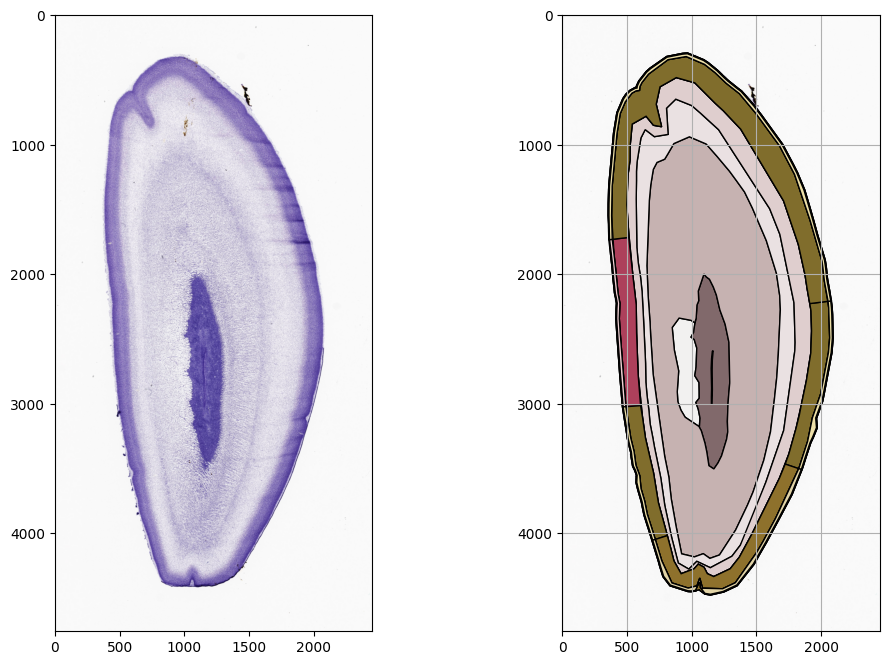

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img)
for ontoid,shplist in shapes.items():
    shp = shplist[0]
    color = allen_onto_helper.onto_lookup[ontoid].color_hex_triplet
    plot_shape(shp,color)
    # break

In [12]:
allen_onto_helper.search('occipital cortex')

[('occipital neocortex', 91.42857142857143, 10268)]

## Low level calls 

Uses Allen API (https://community.brain-map.org/t/atlas-drawing-and-ontologies/2864)
to fetch Allen Developing human brain atlas

In [19]:
import requests
import sys
sys.path.append('..')

from allen_functions import (
    fetch_atlas_metadata, fetch_graphic_groups, fetch_atlas_images, 
    get_image_url, get_svg_url
)

from PIL import Image
import numpy as np
from io import BytesIO
import json

from matplotlib import pyplot as plt

atlas ids:
* 3 = 21 pcw cerebrum
* 287730656 = 21 pcw brainstem
* 138322603 = 15 pcw

In [20]:
atlas_id=3

metadata = fetch_atlas_metadata( atlas_id )
images = fetch_atlas_images( metadata )
graphic_groups = fetch_graphic_groups( metadata )

In [21]:
'number of images: %d' % len(images)

'number of images: 169'

In [22]:
# mpp = 2^downsample
downsample = 3  # implies mpp=8

In [23]:
for img in images:
    if img['section_number']==357:
        break

https://atlas.brain-map.org/atlas?atlas=3#atlas=3&plate=101892528&structure=10529&x=7370.675223214286&y=17332.862723214286&zoom=-5&resolution=45.05&z=3

In [24]:
img

{'annotated': True,
 'axes': None,
 'bits_per_component': 8,
 'data_set_id': 100134982,
 'expression': False,
 'expression_path': None,
 'failed': False,
 'height': 38048,
 'id': 101892528,
 'image_height': 38064,
 'image_type': 'Primary',
 'image_width': 19632,
 'isi_experiment_id': None,
 'lims1_id': 101892528,
 'number_of_components': 3,
 'ophys_experiment_id': None,
 'path': '/external/devhuman/prod13/0536130347/0536130347.aff',
 'projection_function': None,
 'resolution': 0.9866,
 'section_number': 357,
 'specimen_id': None,
 'structure_id': None,
 'tier_count': 9,
 'width': 19616,
 'x': 0,
 'y': 0,
 'atlas_data_set': {'blue_channel': None,
  'delegate': False,
  'expression': False,
  'failed': False,
  'failed_facet': 734881840,
  'green_channel': None,
  'id': 100134982,
  'name': None,
  'plane_of_section_id': 1,
  'qc_date': '2011-05-19T18:16:14Z',
  'red_channel': None,
  'reference_space_id': None,
  'rnaseq_design_id': None,
  'section_thickness': 20.0,
  'specimen_id': 70

In [6]:
# img = images[20]
image_url = get_image_url(atlas_id, img, downsample, False)
annot_url = get_svg_url(atlas_id, img, graphic_groups[-1:], downsample)

In [7]:
req = requests.get(image_url, timeout=500, stream=True)
im = Image.open(BytesIO(req.content))

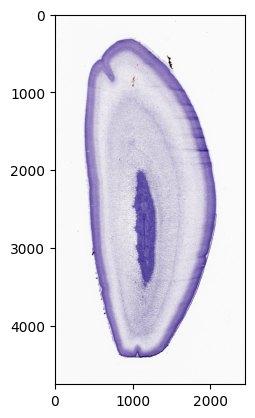

In [8]:
plt.imshow(im)

In [9]:
annot_url

'http://api.brain-map.org/api/v2/svg/101892528?downsample=3&groups=31'

In [10]:
req = requests.get(annot_url, timeout=500)

In [11]:
from allen_functions import get_svg_paths, make_polyshape, make_geojson_feature

In [12]:
svg_data = req.text

In [13]:
paths = get_svg_paths(svg_data)

In [14]:
paths.keys()

dict_keys(['10155', '10595', '10596', '10557', '10561', '11580', '12967', '11587', '11586', '11585', '11583', '10542', '10536', '10529', '10522', '10515', '11716', '11664', '11661', '11658', '11652', '10508', '11630', '11612', '11611', '11610', '11608'])

In [15]:
# for ontoid,coords in paths.items():
#     print(ontoid,len(coords))

In [19]:
strid ='10536' # '10529' #  #'10155'
coords = paths[strid]
shp = make_polyshape(paths[strid],True)

gj = make_geojson_feature(strid, shp)


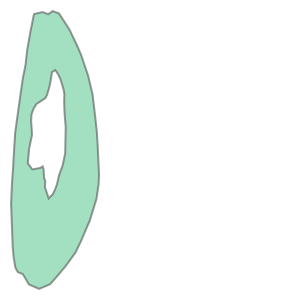

In [20]:
shp

In [28]:
# gj

In [34]:
from IPython.display import SVG
# display(SVG(req.content))